In [1]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from konlpy.tag import Okt
okt = Okt()

In [3]:
openFileName = '전자담배 증상_naver_kin_921.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
data = ''

for item in jsonData:
    if 'description' in item.keys():
        data = data + re.sub(r'[^\w]', ' ', item['description']) + ' '

# f.close()

In [4]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]



In [5]:
data=tokenizer(data)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 1086)	1
  (1, 1888)	1
  (2, 68)	1
  (3, 1448)	1
  (4, 2044)	1
  (5, 1126)	1
  (6, 845)	1
  (7, 471)	1
  (8, 987)	1
  (9, 764)	1
  (10, 829)	1
  (11, 765)	1
  (12, 1888)	1
  (13, 216)	1
  (14, 2086)	1
  (15, 1888)	1
  (16, 1874)	1
  (17, 2061)	1
  (18, 311)	1
  (19, 776)	1
  (20, 1888)	1
  (21, 1298)	1
  (22, 1086)	1
  (23, 324)	1
  (24, 2527)	1
  :	:
  (16351, 1298)	1
  (16352, 37)	1
  (16353, 886)	1
  (16354, 2104)	1
  (16355, 1171)	1
  (16356, 1888)	1
  (16357, 1171)	1
  (16358, 2049)	1
  (16359, 1377)	1
  (16360, 2238)	1
  (16361, 2248)	1
  (16362, 1888)	1
  (16363, 2594)	1
  (16364, 92)	1
  (16365, 2395)	1
  (16366, 860)	1
  (16367, 2571)	1
  (16368, 2044)	1
  (16369, 505)	1
  (16370, 635)	1
  (16371, 447)	1
  (16372, 975)	1
  (16373, 2591)	1
  (16374, 2060)	1
  (16375, 2086)	1


In [8]:
print(vectorize.vocabulary_)

{'사용': 1086, '전자담배': 1888, '갑자기': 68, '어지러움': 1448, '증상': 2044, '상도': 1126, '바꿧': 845, '다른': 471, '부위': 987, '모두': 764, '뭔가': 829, '모드': 765, '관련': 216, '질문': 2086, '전문': 1874, '지식': 2061, '금연': 311, '목적': 776, '시작': 1298, '기기': 324, '호흡': 2527, '경우': 153, '담배': 505, '가래': 14, '자꾸': 1799, '원래': 1595, '전담': 1870, '연초': 1507, '흡연': 2591, '기관지': 322, '상태': 1139, '음식': 1647, '최대한': 2169, '후크': 2575, '부산': 985, '동래': 593, '안락': 1397, '저스트': 1860, '포그': 2366, '배터리': 901, '고장': 185, '교환': 230, '흡입': 2594, '경험': 157, '사람': 1067, '유독': 1616, '물질': 826, '강도': 70, '인체': 1736, '반응': 867, '의미': 1658, '생각': 1150, '최근': 2167, '혹시': 2529, '원인': 1598, '고생': 175, '자극': 1797, '마찰': 698, '지속': 2060, '병원': 940, '진단': 2079, '치료': 2198, '발생': 873, '보이': 961, '교체': 229, '격감': 130, '다량': 470, '독성': 586, '반년': 860, '정도': 1922, '대학생': 544, '비염': 1041, '요새': 1569, '감기': 61, '전혀': 1896, '코로': 2237, '상이': 1134, '가요': 33, '수명': 1243, '보통': 966, '충전기': 2185, '만약': 705, '휴대폰': 2580, '고속': 176, '쓰시': 1357, '부작용': 990, 

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'사용': 232,
 '전자담배': 1157,
 '갑자기': 31,
 '어지러움': 10,
 '증상': 1194,
 '상도': 10,
 '바꿧': 2,
 '다른': 40,
 '부위': 10,
 '모두': 15,
 '뭔가': 15,
 '모드': 19,
 '관련': 23,
 '질문': 62,
 '전문': 3,
 '지식': 17,
 '금연': 270,
 '목적': 5,
 '시작': 57,
 '기기': 62,
 '호흡': 36,
 '경우': 122,
 '담배': 436,
 '가래': 30,
 '자꾸': 10,
 '원래': 21,
 '전담': 72,
 '연초': 131,
 '흡연': 107,
 '기관지': 9,
 '상태': 53,
 '음식': 14,
 '최대한': 10,
 '후크': 2,
 '부산': 28,
 '동래': 27,
 '안락': 1,
 '저스트': 36,
 '포그': 35,
 '배터리': 113,
 '고장': 26,
 '교환': 8,
 '흡입': 80,
 '경험': 18,
 '사람': 42,
 '유독': 13,
 '물질': 50,
 '강도': 8,
 '인체': 13,
 '반응': 18,
 '의미': 16,
 '생각': 89,
 '최근': 18,
 '혹시': 37,
 '원인': 37,
 '고생': 4,
 '자극': 9,
 '마찰': 2,
 '지속': 23,
 '병원': 47,
 '진단': 21,
 '치료': 22,
 '발생': 83,
 '보이': 6,
 '교체': 68,
 '격감': 10,
 '다량': 8,
 '독성': 22,
 '반년': 4,
 '정도': 116,
 '대학생': 2,
 '비염': 10,
 '요새': 7,
 '감기': 13,
 '전혀': 21,
 '코로': 2,
 '상이': 80,
 '가요': 40,
 '수명': 8,
 '보통': 35,
 '충전기': 25,
 '만약': 11,
 '휴대폰': 5,
 '고속': 1,
 '쓰시': 4,
 '부작용': 86,
 '여기': 15,
 '네이버': 16,
 '디렉토리': 1,
 '격는': 6,
 '사례'

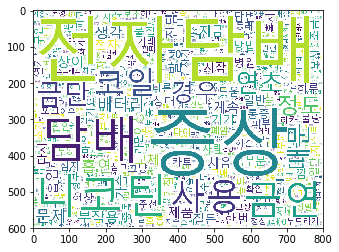

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'사용': 1086, '전자담배': 1888, '갑자기': 68, '어지러움': 1448, '증상': 2044, '상도': 1126, '바꿧': 845, '다른': 471, '부위': 987, '모두': 764, '뭔가': 829, '모드': 765, '관련': 216, '질문': 2086, '전문': 1874, '지식': 2061, '금연': 311, '목적': 776, '시작': 1298, '기기': 324, '호흡': 2527, '경우': 153, '담배': 505, '가래': 14, '자꾸': 1799, '원래': 1595, '전담': 1870, '연초': 1507, '흡연': 2591, '기관지': 322, '상태': 1139, '음식': 1647, '최대한': 2169, '후크': 2575, '부산': 985, '동래': 593, '안락': 1397, '저스트': 1860, '포그': 2366, '배터리': 901, '고장': 185, '교환': 230, '흡입': 2594, '경험': 157, '사람': 1067, '유독': 1616, '물질': 826, '강도': 70, '인체': 1736, '반응': 867, '의미': 1658, '생각': 1150, '최근': 2167, '혹시': 2529, '원인': 1598, '고생': 175, '자극': 1797, '마찰': 698, '지속': 2060, '병원': 940, '진단': 2079, '치료': 2198, '발생': 873, '보이': 961, '교체': 229, '격감': 130, '다량': 470, '독성': 586, '반년': 860, '정도': 1922, '대학생': 544, '비염': 1041, '요새': 1569, '감기': 61, '전혀': 1896, '코로': 2237, '상이': 1134, '가요': 33, '수명': 1243, '보통': 966, '충전기': 2185, '만약': 705, '휴대폰': 2580, '고속': 176, '쓰시': 1357, '부작용': 990, 

In [14]:
freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'사용': 232.0,
 '전자담배': 1157.0,
 '갑자기': 31.0,
 '어지러움': 10.0,
 '증상': 1194.0,
 '상도': 10.0,
 '바꿧': 2.0,
 '다른': 40.0,
 '부위': 10.0,
 '모두': 15.0,
 '뭔가': 15.0,
 '모드': 19.0,
 '관련': 23.0,
 '질문': 62.0,
 '전문': 3.0,
 '지식': 17.0,
 '금연': 270.0,
 '목적': 5.0,
 '시작': 57.0,
 '기기': 62.0,
 '호흡': 36.0,
 '경우': 122.0,
 '담배': 436.0,
 '가래': 30.0,
 '자꾸': 10.0,
 '원래': 21.0,
 '전담': 72.0,
 '연초': 131.0,
 '흡연': 107.0,
 '기관지': 9.0,
 '상태': 53.0,
 '음식': 14.0,
 '최대한': 10.0,
 '후크': 2.0,
 '부산': 28.0,
 '동래': 27.0,
 '안락': 1.0,
 '저스트': 36.0,
 '포그': 35.0,
 '배터리': 113.0,
 '고장': 26.0,
 '교환': 8.0,
 '흡입': 80.0,
 '경험': 18.0,
 '사람': 42.0,
 '유독': 13.0,
 '물질': 50.0,
 '강도': 8.0,
 '인체': 13.0,
 '반응': 18.0,
 '의미': 16.0,
 '생각': 89.0,
 '최근': 18.0,
 '혹시': 37.0,
 '원인': 37.0,
 '고생': 4.0,
 '자극': 9.0,
 '마찰': 2.0,
 '지속': 23.0,
 '병원': 47.0,
 '진단': 21.0,
 '치료': 22.0,
 '발생': 83.0,
 '보이': 6.0,
 '교체': 68.0,
 '격감': 10.0,
 '다량': 8.0,
 '독성': 22.0,
 '반년': 4.0,
 '정도': 116.0,
 '대학생': 2.0,
 '비염': 10.0,
 '요새': 7.0,
 '감기': 13.0,
 '전혀': 21.0,
 '코로': 2.0,
 '상이': 

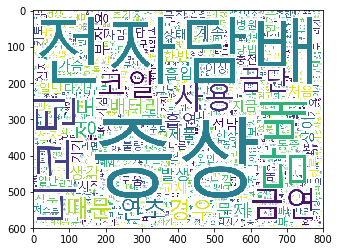

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()